In [3]:
path="food_ingredients_and_allergens.csv"
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv(path)
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,NaN,NaN,Salt,Dairy,Contains


In [5]:
df.shape

(399, 7)

In [6]:
# Replace 'NaN' with space
df = df.fillna(' ')

In [7]:
sum(df.duplicated())


90

In [8]:
df['text']=df['Food Product']+' '+df['Main Ingredient']+' '+df['Sweetener']+' '+df['Fat/Oil']+' '+df['Seasoning']+' '+df['Allergens']


In [9]:
df.replace('Vegetable oil', 'VegetableOil', regex=True, inplace=True)
df.replace('Olive oil', 'OliveOil', regex=True, inplace=True)

In [10]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [11]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if pd.isna(text):  # Check for NaN values
        return ""  # Return an empty string for NaN values
    # Convert text to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize the text
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    # Perform stemming
    stemmed_words = [stemmer.stem(word) for word in tokens]
    
    # Perform lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
    
    # Join the processed words back into a clean text
    clean_text = ' '.join(lemmatized_words)
    
    return clean_text

# Assuming 'df' is your DataFrame and 'content' is the column with movie overviews
df['cleanText'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df.describe()


,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction,text,cleanText
count,399,399,399,399,399,399,399,399,399
unique,259,101,10,36,186,40,3,308,307
top,Stuffed Bell Peppers,Chicken,,OliveOil,,,Contains,Stuffed Bell Peppers Bell peppers OliveOil G...,stuf bell pepper bell pepper oliveoil ground m...
freq,4,61,280,90,20,148,255,4,4


In [13]:
df = df[df['Prediction'].str.strip() != '']

In [14]:
from collections import Counter
Counter(df["Prediction"])

Counter({'Contains': 255, 'Does not contain': 143})

# Assigning target and features


In [15]:
target=df['Prediction']
features=df['text']

In [16]:
#spliting
from sklearn.model_selection import train_test_split

features_train , features_test , target_train , target_test = train_test_split(features,target , test_size=0.2 , random_state=23)

In [17]:
#Feature Extraction (Bag of Words and TFIDF Vectorizer)


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(features_train)
X_test_bow = bow_vectorizer.transform(features_test)
kfoldbow = bow_vectorizer.fit_transform(features)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trainf = vectorizer.fit_transform(features_train)
testf = vectorizer.transform(features_test)
kfoldtfidf = vectorizer.fit_transform(features)

In [24]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------  1.8/1.8 MB 50.7 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 5.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.metrics import confusion_matrix

In [26]:
from zeugma.embeddings import EmbeddingTransformer

glove = EmbeddingTransformer('glove')
x_traing = glove.transform(features_train)
x_testg = glove.transform(features_test)
kfoldglove = glove.fit_transform(features)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\lab\anaconda3\Lib\site-packages\gensim\matutils.py", line 1356, in <module>
    from gensim.corpora._mmreader import MmReader  # noqa: F401
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "gensim\corpora\_mmreader.pyx", line 11, in init gensim.corpora._mmreader
ImportError: cannot import name utils

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\lab\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\lab\AppData\Local\Temp\ipykernel_12748\1727471813.py", line 1, in <module>
    from zeugma.embeddings import EmbeddingTransformer
  File "C:\Users\lab\anaconda3\Lib\site-packages\zeugma\__init__.py", line 9, in <module>
    from .embeddings import EmbeddingTransformer  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lab\anaconda3

In [33]:
#RF TFIDF
#%%time
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(max_depth=15, random_state=0)
ran.fit(trainf, target_train)
y_pred=ran.predict(testf)
from sklearn.metrics import classification_report
print(classification_report(target_test, y_pred))
print(confusion_matrix(target_test, y_pred))

                  precision    recall  f1-score   support

        Contains       0.98      0.96      0.97        54
Does not contain       0.93      0.96      0.94        26

        accuracy                           0.96        80
       macro avg       0.95      0.96      0.96        80
    weighted avg       0.96      0.96      0.96        80

[[52  2]
 [ 1 25]]


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Create classifier
ran = RandomForestClassifier(max_depth=15, random_state=0)

# Setup stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Perform cross-validation
scores = cross_validate(ran, trainf, target_train, cv=cv,
                        scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
                        return_train_score=False)

# Print mean and standard deviation for each metric
print("Cross-validation results (mean ± std):")
for metric in scores:
    if metric.startswith("test_"):
        mean = np.mean(scores[metric])
        std = np.std(scores[metric])
        print(f"{metric}: {mean:.4f} ± {std:.4f}")

# Train on full training set and evaluate on test set
ran.fit(trainf, target_train)
y_pred = ran.predict(testf)
print("\nEvaluation on test set:")
print(classification_report(target_test, y_pred))
print(confusion_matrix(target_test, y_pred))


Cross-validation results (mean ± std):
test_accuracy: 0.9809 ± 0.0294
test_precision_macro: 0.9775 ± 0.0338
test_recall_macro: 0.9830 ± 0.0284
test_f1_macro: 0.9798 ± 0.0315

Evaluation on test set:
                  precision    recall  f1-score   support

        Contains       0.98      0.96      0.97        54
Does not contain       0.93      0.96      0.94        26

        accuracy                           0.96        80
       macro avg       0.95      0.96      0.96        80
    weighted avg       0.96      0.96      0.96        80

[[52  2]
 [ 1 25]]


In [44]:
%%time
from sklearn.linear_model import LogisticRegression
log_bow = LogisticRegression(random_state=0).fit(X_train_bow, target_train)
log_pred_bow=log_bow.predict(X_test_bow)
from sklearn.metrics import classification_report
print(classification_report(target_test, log_pred_bow))
print(confusion_matrix(target_test, log_pred_bow))

                  precision    recall  f1-score   support

        Contains       0.96      0.96      0.96        54
Does not contain       0.92      0.92      0.92        26

        accuracy                           0.95        80
       macro avg       0.94      0.94      0.94        80
    weighted avg       0.95      0.95      0.95        80

[[52  2]
 [ 2 24]]
CPU times: total: 15.6 ms
Wall time: 5.6 ms


In [46]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels as integers
le = LabelEncoder()
target_train_encoded = le.fit_transform(target_train)

# Train model again with encoded targets
log_bow_2D.fit(X_train_bow_2D, target_train_encoded)


LogisticRegression(random_state=0)

C:\Users\lab\AppData\Local\Temp\ipykernel_12748\1644434108.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[target_train_encoded == j, 0], x_set[target_train_encoded == j, 1],
C:\Users\lab\AppData\Local\Temp\ipykernel_12748\1644434108.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[target_train_encoded == j, 0], x_set[target_train_encoded == j, 1],


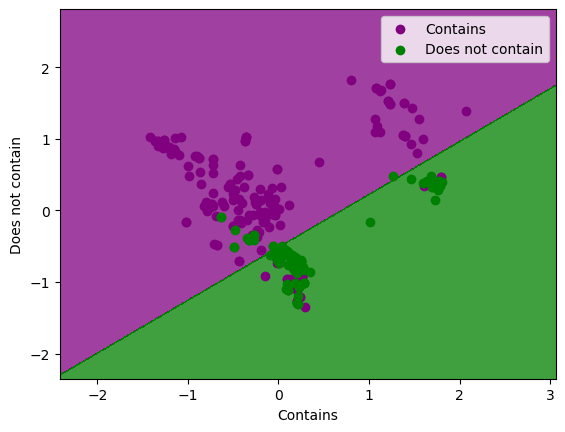

In [50]:
# Create meshgrid
x_set, y_set = X_train_bow_2D, target_train_encoded
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

# Predict using mesh points
Z = log_bow_2D.predict(np.array([x1.ravel(), x2.ravel()]).T)
Z = Z.reshape(x1.shape)

# Plot decision boundary
plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('purple', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Scatter actual points
for i, j in enumerate(np.unique(target_train_encoded)):
    plt.scatter(x_set[target_train_encoded == j, 0], x_set[target_train_encoded == j, 1],
                c=ListedColormap(('purple', 'green'))(i), label=le.inverse_transform([j])[0])


plt.xlabel('Contains')
plt.ylabel('Does not contain')
plt.savefig("logistic_regression_training_set.pdf", format='pdf', dpi=300)

plt.legend()
plt.show()


In [53]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding

In [54]:
from keras import optimizers
import tensorflow.keras
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
tokenizer = tensorflow.keras.preprocessing.text.Tokenizer(num_words=500, lower=True,split=' ',filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(df["cleanText"].values)
#print(tokenizer.word_index)  # To see the dicstionary
X = tokenizer.texts_to_sequences(df["cleanText"].values)
X = tensorflow.keras.preprocessing.sequence.pad_sequences(X)

Y = pd.get_dummies(df["Prediction"]).values

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 0.2, random_state =2)
batch_size=16

In [55]:
%%time
#Deep Learning Network Structure
model_conv = Sequential()
model_conv.add(Embedding(500,100, input_length=X.shape[1]))
model_conv.add(Dropout(0.5))
model_conv.add(LSTM(64))
model_conv.add(Dropout(0.5))
model_conv.add(Dense(2, activation='softmax'))
model_conv.compile(loss='binary_crossentropy', optimizer='adam',   metrics=['accuracy','mae','mse'])
#Y = data.Reviewer_Score

pred=model_conv.fit(X_train, Y_train, batch_size =batch_size, epochs =100, verbose =2,validation_data=(X_valid,Y_valid))
pred

C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
20/20 - 4s - 220ms/step - accuracy: 0.6509 - loss: 0.6673 - mae: 0.4726 - mse: 0.2264 - val_accuracy: 0.5875 - val_loss: 0.6384 - val_mae: 0.4395 - val_mse: 0.2055
Epoch 2/100
20/20 - 0s - 5ms/step - accuracy: 0.7358 - loss: 0.5153 - mae: 0.3232 - mse: 0.1429 - val_accuracy: 0.9750 - val_loss: 0.3838 - val_mae: 0.2168 - val_mse: 0.0751
Epoch 3/100
20/20 - 0s - 5ms/step - accuracy: 0.9560 - loss: 0.2546 - mae: 0.1316 - mse: 0.0510 - val_accuracy: 0.9500 - val_loss: 0.2637 - val_mae: 0.1226 - val_mse: 0.0528
Epoch 4/100
20/20 - 0s - 6ms/step - accuracy: 0.9780 - loss: 0.1458 - mae: 0.0613 - mse: 0.0207 - val_accuracy: 0.9750 - val_loss: 0.1894 - val_mae: 0.0594 - val_mse: 0.0284
Epoch 5/100
20/20 - 0s - 5ms/step - accuracy: 0.9874 - loss: 0.0758 - mae: 0.0224 - mse: 0.0116 - val_accuracy: 0.9625 - val_loss: 0.1773 - val_mae: 0.0545 - val_mse: 0.0357
Epoch 6/100
20/20 - 0s - 5ms/step - accuracy: 0.9811 - loss: 0.0575 - mae: 0.0215 - mse: 0.0141 - val_accuracy: 0.9750 - val_los

Epoch 47/100
20/20 - 0s - 5ms/step - accuracy: 1.0000 - loss: 5.9639e-04 - mae: 3.4190e-05 - mse: 3.4922e-07 - val_accuracy: 0.9250 - val_loss: 0.2811 - val_mae: 0.0744 - val_mse: 0.0738
Epoch 48/100
20/20 - 0s - 5ms/step - accuracy: 1.0000 - loss: 3.0503e-04 - mae: 4.8700e-07 - mse: 6.3770e-12 - val_accuracy: 0.9250 - val_loss: 0.2712 - val_mae: 0.0723 - val_mse: 0.0691
Epoch 49/100
20/20 - 0s - 5ms/step - accuracy: 1.0000 - loss: 2.4762e-04 - mae: 2.6378e-07 - mse: 1.5941e-12 - val_accuracy: 0.9250 - val_loss: 0.2933 - val_mae: 0.0741 - val_mse: 0.0731
Epoch 50/100
20/20 - 0s - 5ms/step - accuracy: 1.0000 - loss: 2.3623e-04 - mae: 3.3782e-07 - mse: 7.4340e-12 - val_accuracy: 0.9250 - val_loss: 0.3170 - val_mae: 0.0747 - val_mse: 0.0743
Epoch 51/100
20/20 - 0s - 5ms/step - accuracy: 1.0000 - loss: 2.0257e-04 - mae: 2.8946e-07 - mse: 6.8564e-12 - val_accuracy: 0.9250 - val_loss: 0.3371 - val_mae: 0.0748 - val_mse: 0.0746
Epoch 52/100
20/20 - 0s - 5ms/step - accuracy: 1.0000 - loss: 1.5

Epoch 91/100
20/20 - 0s - 5ms/step - accuracy: 1.0000 - loss: 6.5258e-05 - mae: 2.3673e-08 - mse: 2.8092e-14 - val_accuracy: 0.9250 - val_loss: 0.4799 - val_mae: 0.0750 - val_mse: 0.0750
Epoch 92/100
20/20 - 0s - 5ms/step - accuracy: 1.0000 - loss: 6.1833e-05 - mae: 3.7434e-08 - mse: 1.4896e-13 - val_accuracy: 0.9250 - val_loss: 0.4851 - val_mae: 0.0751 - val_mse: 0.0750
Epoch 93/100
20/20 - 0s - 5ms/step - accuracy: 1.0000 - loss: 5.9432e-05 - mae: 6.5537e-08 - mse: 8.7346e-13 - val_accuracy: 0.9250 - val_loss: 0.4689 - val_mae: 0.0750 - val_mse: 0.0750
Epoch 94/100
20/20 - 0s - 5ms/step - accuracy: 1.0000 - loss: 6.8127e-05 - mae: 6.8613e-08 - mse: 5.1234e-13 - val_accuracy: 0.9250 - val_loss: 0.4834 - val_mae: 0.0750 - val_mse: 0.0750
Epoch 95/100
20/20 - 0s - 5ms/step - accuracy: 1.0000 - loss: 5.7246e-05 - mae: 4.9830e-08 - mse: 4.3469e-13 - val_accuracy: 0.9250 - val_loss: 0.4888 - val_mae: 0.0750 - val_mse: 0.0750
Epoch 96/100
20/20 - 0s - 5ms/step - accuracy: 1.0000 - loss: 5.9

In [56]:
rounded_predictions = model_conv.predict(X_valid, batch_size=16, verbose=0)
rounded_labels=np.argmax(Y_valid, axis=1)
rounded_predictions1=np.argmax(rounded_predictions, axis=1)
print(classification_report(rounded_labels,rounded_predictions1))
print(confusion_matrix(rounded_labels,rounded_predictions1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        47
           1       1.00      0.85      0.92        33

    accuracy                           0.94        80
   macro avg       0.95      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80

[[47  0]
 [ 5 28]]


In [ ]:
#LSTM

In [71]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np

# Ensure Y is one-hot encoded if not already
# Y = to_categorical(Y, num_classes=2)

start_time = time.time()  # Start the timer

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []
f1s = []

for train_idx, val_idx in kfold.split(X):
    X_train, X_valid = X[train_idx], X[val_idx]
    Y_train, Y_valid = Y[train_idx], Y[val_idx]

    # Define model
    model_conv = Sequential()
    model_conv.add(Embedding(500, 100, input_length=X.shape[1]))
    model_conv.add(Dropout(0.5))
    model_conv.add(LSTM(64))
    model_conv.add(Dropout(0.5))
    model_conv.add(Dense(2, activation='softmax'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model_conv.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=0, validation_data=(X_valid, Y_valid))

    # Predict and evaluate
    predictions = model_conv.predict(X_valid, batch_size=16, verbose=0)
    y_true = np.argmax(Y_valid, axis=1)
    y_pred = np.argmax(predictions, axis=1)

    # Collect metrics
    accuracies.append(accuracy_score(y_true, y_pred))
    precisions.append(precision_score(y_true, y_pred, average='macro'))
    recalls.append(recall_score(y_true, y_pred, average='macro'))
    f1s.append(f1_score(y_true, y_pred, average='macro'))

end_time = time.time()  # End the timer
elapsed_time_seconds = end_time - start_time  # Elapsed time in seconds

# Print Mean & Std for metrics
print(f"\nCross-Validation Results (10 folds):")
print(f"Accuracy:  {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
print(f"Recall:    {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
print(f"F1 Score:  {np.mean(f1s):.4f} ± {np.std(f1s):.4f}")

# Print wall time in seconds
print(f"\nWall time: {elapsed_time_seconds:.2f} seconds")


C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\l


Cross-Validation Results (10 folds):
Accuracy:  0.9624 ± 0.0230
Precision: 0.9570 ± 0.0214
Recall:    0.9646 ± 0.0256
F1 Score:  0.9590 ± 0.0237

Wall time: 31.06 seconds


In [ ]:
#gru+RNN

In [70]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, GRU, SimpleRNN, Dense, Dropout
import numpy as np

# Make sure Y is one-hot encoded if not already
# Y = to_categorical(Y, num_classes=2)

start_time = time.time()  # Start the timer

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Metrics lists
accuracies = []
precisions = []
recalls = []
f1s = []

for train_idx, val_idx in kfold.split(X):
    X_train, X_valid = X[train_idx], X[val_idx]
    Y_train, Y_valid = Y[train_idx], Y[val_idx]

    # Build model
    model_conv = Sequential()
    model_conv.add(Embedding(500, 100, input_length=X.shape[1]))
    model_conv.add(Dropout(0.5))
    model_conv.add(GRU(64, return_sequences=True))
    model_conv.add(SimpleRNN(32))
    model_conv.add(Dense(16))
    model_conv.add(Dense(2, activation='softmax'))

    model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model_conv.fit(X_train, Y_train, batch_size=16, epochs=10, verbose=0, validation_data=(X_valid, Y_valid))

    # Predict and evaluate
    predictions = model_conv.predict(X_valid, batch_size=16, verbose=0)
    y_true = np.argmax(Y_valid, axis=1)
    y_pred = np.argmax(predictions, axis=1)

    # Collect metrics
    accuracies.append(accuracy_score(y_true, y_pred))
    precisions.append(precision_score(y_true, y_pred, average='macro'))
    recalls.append(recall_score(y_true, y_pred, average='macro'))
    f1s.append(f1_score(y_true, y_pred, average='macro'))

end_time = time.time()  # End the timer
elapsed_time_seconds = end_time - start_time  # Elapsed time in seconds

# Output mean and standard deviation
print(f"\nCross-Validation Results (10 folds):")
print(f"Accuracy:  {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
print(f"Recall:    {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
print(f"F1 Score:  {np.mean(f1s):.4f} ± {np.std(f1s):.4f}")

print(f"\nWall time: {elapsed_time_seconds:.2f} seconds")


C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\l


Cross-Validation Results (10 folds):
Accuracy:  0.9599 ± 0.0299
Precision: 0.9537 ± 0.0307
Recall:    0.9602 ± 0.0350
F1 Score:  0.9557 ± 0.0326

Wall time: 49.73 seconds


In [ ]:
#lstm+cnn

In [69]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
import numpy as np

# Ensure Y is one-hot encoded
# Y = to_categorical(Y, num_classes=2)

start_time = time.time()  # Start the timer

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Store metrics
accuracies = []
precisions = []
recalls = []
f1s = []

for train_idx, val_idx in kfold.split(X):
    X_train, X_valid = X[train_idx], X[val_idx]
    Y_train, Y_valid = Y[train_idx], Y[val_idx]

    # Build CNN + LSTM model
    model_conv = Sequential()
    model_conv.add(Embedding(5000, 100, input_length=X.shape[1]))
    model_conv.add(Conv1D(128, 5, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=5))
    model_conv.add(LSTM(100))
    model_conv.add(Dense(16))
    model_conv.add(Dense(2, activation='softmax'))

    model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model_conv.fit(X_train, Y_train, batch_size=16, epochs=10, verbose=0, validation_data=(X_valid, Y_valid))

    # Evaluate
    predictions = model_conv.predict(X_valid, batch_size=16, verbose=0)
    y_true = np.argmax(Y_valid, axis=1)
    y_pred = np.argmax(predictions, axis=1)

    # Collect metrics
    accuracies.append(accuracy_score(y_true, y_pred))
    precisions.append(precision_score(y_true, y_pred, average='macro'))
    recalls.append(recall_score(y_true, y_pred, average='macro'))
    f1s.append(f1_score(y_true, y_pred, average='macro'))

end_time = time.time()  # End the timer
elapsed_time_seconds = end_time - start_time  # Elapsed time in seconds

# Output mean and standard deviation
print(f"\nCross-Validation Results (10 folds):")
print(f"Accuracy:  {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
print(f"Recall:    {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
print(f"F1 Score:  {np.mean(f1s):.4f} ± {np.std(f1s):.4f}")

print(f"\nWall time: {elapsed_time_seconds:.2f} seconds")



C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\l


Cross-Validation Results (10 folds):
Accuracy:  0.9297 ± 0.0484
Precision: 0.9261 ± 0.0483
Recall:    0.9329 ± 0.0537
F1 Score:  0.9237 ± 0.0540

Wall time: 37.62 seconds


In [ ]:
#gru+cCNN+RNN


In [67]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, GRU, Conv1D, MaxPooling1D, Dropout, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# One-hot encode Y if needed
# Y = to_categorical(Y, num_classes=2)

start_time = time.time()

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracies, precisions, recalls, f1s = [], [], [], []

for train_idx, val_idx in kfold.split(X):
    X_train, X_valid = X[train_idx], X[val_idx]
    Y_train, Y_valid = Y[train_idx], Y[val_idx]

    model_conv = Sequential()
    model_conv.add(Embedding(500, 100, input_length=X.shape[1]))
    model_conv.add(GRU(128, return_sequences=True))
    model_conv.add(Conv1D(64, 3, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=2))
    model_conv.add(Dropout(0.5))
    model_conv.add(SimpleRNN(16))
    model_conv.add(Dense(16))
    model_conv.add(Dense(2, activation='softmax'))

    model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_conv.fit(X_train, Y_train, batch_size=16, epochs=10, verbose=0, validation_data=(X_valid, Y_valid))

    predictions = model_conv.predict(X_valid, batch_size=16, verbose=0)
    y_true = np.argmax(Y_valid, axis=1)
    y_pred = np.argmax(predictions, axis=1)

    accuracies.append(accuracy_score(y_true, y_pred))
    precisions.append(precision_score(y_true, y_pred, average='macro'))
    recalls.append(recall_score(y_true, y_pred, average='macro'))
    f1s.append(f1_score(y_true, y_pred, average='macro'))

# Results
print(f"\nCross-Validation Results (5 folds):")
print(f"Accuracy:  {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
print(f"Recall:    {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
print(f"F1 Score:  {np.mean(f1s):.4f} ± {np.std(f1s):.4f}")

end_time = time.time()
print(f"\nWall time: {end_time - start_time:.2f} seconds")


C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\lab\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\l


Cross-Validation Results (5 folds):
Accuracy:  0.9474 ± 0.0343
Precision: 0.9439 ± 0.0404
Recall:    0.9403 ± 0.0386
F1 Score:  0.9405 ± 0.0385

Wall time: 56.11 seconds


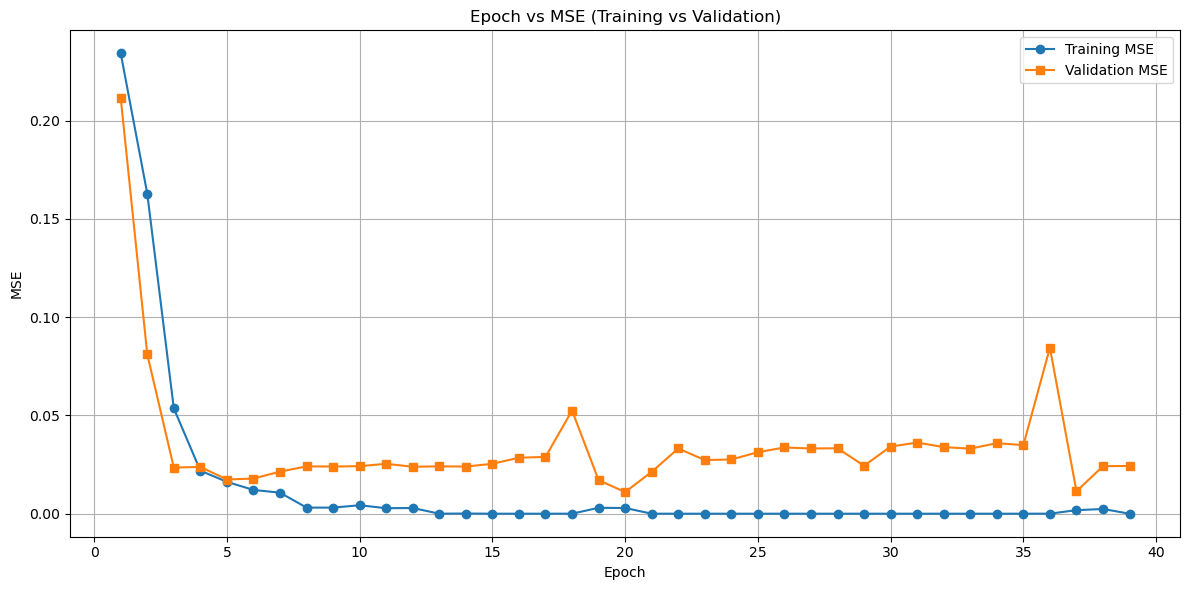

In [72]:
import matplotlib.pyplot as plt

# Extracted MSE and val_MSE values from your log
epochs = list(range(1, 40))  # Since you shared 39 epochs
mse = [
    0.2343, 0.1629, 0.0536, 0.0219, 0.0162, 0.0121, 0.0107, 0.0031, 0.0031, 0.0043,
    0.0028, 0.0029, 1.1589e-05, 8.9599e-05, 2.0743e-07, 1.3026e-08, 3.6037e-09, 1.0266e-05,
    0.0030, 0.0029, 8.7015e-06, 8.2537e-07, 4.5248e-08, 4.7190e-08, 2.8772e-11, 7.1636e-10,
    4.0679e-10, 1.0977e-09, 3.4058e-07, 1.2111e-08, 1.7279e-10, 7.1875e-11, 6.8916e-11,
    1.0710e-11, 9.0118e-11, 2.9105e-05, 0.0018, 0.0024, 3.8039e-09
]
val_mse = [
    0.2116, 0.0811, 0.0235, 0.0238, 0.0174, 0.0179, 0.0214, 0.0241, 0.0240, 0.0242,
    0.0254, 0.0239, 0.0241, 0.0240, 0.0254, 0.0285, 0.0289, 0.0525, 0.0171, 0.0110,
    0.0213, 0.0332, 0.0273, 0.0276, 0.0313, 0.0337, 0.0332, 0.0333, 0.0244, 0.0342,
    0.0362, 0.0339, 0.0331, 0.0359, 0.0349, 0.0845, 0.0114, 0.0242, 0.0243
]

plt.figure(figsize=(12, 6))
plt.plot(epochs, mse, label='Training MSE', marker='o')
plt.plot(epochs, val_mse, label='Validation MSE', marker='s')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Epoch vs MSE (Training vs Validation)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
